#  Watershed Algorithm

>Image segmentation is the task of classifying every pixel in the image to some class. For example, classifying every pixel as foreground or background. Image segmentation is important for extracting the relevant parts from an image.
>The watershed algorithm is a classic image segmentation algorithm. It considers the pixel values in an image as topography. For finding the object boundaries, it takes initial markers as input. The algorithm then starts flooding the basin from the markers till the markers meet at the object boundaries.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import imutils

# Data importing

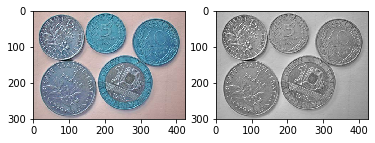

In [2]:
img = cv2.imread("../Data/coins_2.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(gray, 'gray')
plt.show()

# Applying thresholding

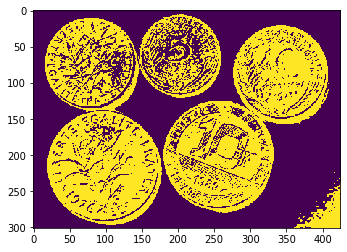

In [3]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh)
plt.show()

# Watershed 

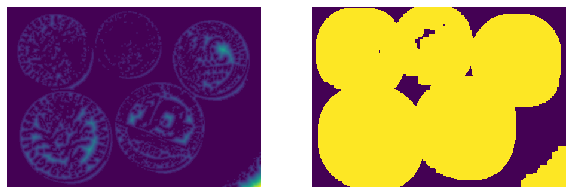

In [4]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=10)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(dist_transform)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sure_bg)
plt.axis('off')

plt.show()

In [5]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

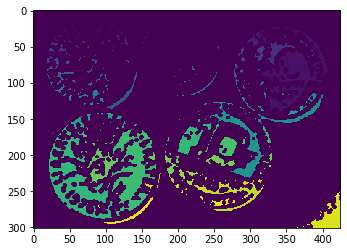

In [6]:
plt.imshow(markers)
plt.show()

# Show results

In [7]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

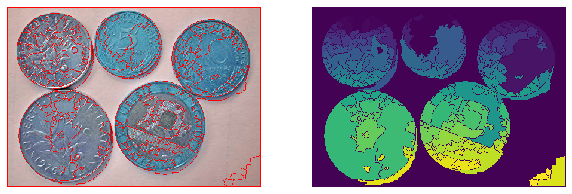

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(markers)
plt.axis('off')

plt.show()